In [5]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/mining/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [6]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [12]:
frame.rename(columns={'Year_no':'year', 'Week_no':'week'}, inplace=True)

In [13]:
frame

year  week  Avg_Nakamoto_index
0    2022    15             137.000
1    2020    11             156.500
2    2020    10             156.333
3    2021    50             128.333
4    2020    21             148.333
..    ...   ...                 ...
162  2022    26             134.000
163  2021    22             142.000
164  2020    33             148.000
165  2020    26             152.000
166  2019    33             159.000

[167 rows x 3 columns]

In [14]:
final = frame.sort_values(by=['year','week'])

In [10]:
final

year  Week_no  Avg_Nakamoto_index
91   2018       27               2.000
96   2018       38             174.000
45   2018       40             169.000
146  2018       41             175.000
140  2018       42             177.000
..    ...      ...                 ...
39   2022       29             135.000
84   2022       30             135.000
149  2022       31             133.000
60   2022       32             134.667
90   2022       33             134.500

[167 rows x 3 columns]

<AxesSubplot: xlabel='date'>

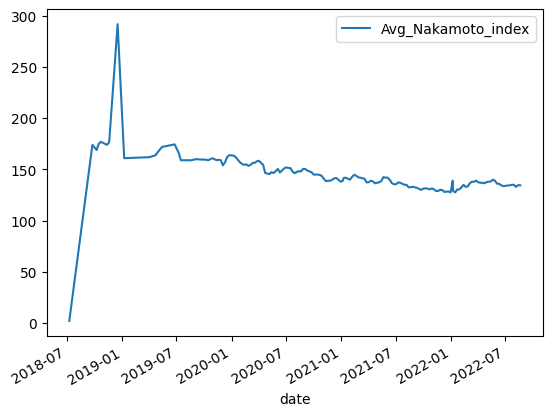

In [16]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='Avg_Nakamoto_index', ax=ax)